# **Artificial Intelligence and Society 2024/2025**
## **Individual Assignment 3: Imbalanced Data**
###### **João Gonçalves**

#### About the dataset

This data set was taken from https://archive.ics.uci.edu/dataset/222/bank+marketing. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The data set has no null values

##### Imports

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours

##### Load the data

In [14]:
df = pd.read_csv('bank.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


##### Data Encoding

In [16]:
df['default'] = df['default'].replace({'yes': 1, 'no': 0}).astype(int)
df['housing'] = df['housing'].replace({'yes': 1, 'no': 0}).astype(int)
df['loan'] = df['loan'].replace({'yes': 1, 'no': 0}).astype(int)

In [18]:
education_mapping = {
    'primary': 1,
    'secondary': 2,
    'tertiary': 3,
    'unknown': 0
}

# Substituir os valores na coluna
df['education'] = df['education'].map(education_mapping)

In [20]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 
    'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 
    'nov': 11, 'dec': 12
}

df['month'] = df['month'].map(month_mapping)

In [22]:
columns_to_encode = ['job', 'marital', 'contact', 'poutcome']
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)

In [23]:
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1,0,1787,0,0,19,10,79,1,...,0,1,0,1,0,0,0,0,0,1
1,33,2,0,4789,1,1,11,5,220,1,...,0,1,0,1,0,0,1,0,0,0
2,35,3,0,1350,1,0,16,4,185,1,...,0,0,1,1,0,0,1,0,0,0
3,30,3,0,1476,1,1,3,6,199,4,...,0,1,0,0,0,1,0,0,0,1
4,59,2,0,0,1,0,5,5,226,1,...,0,1,0,0,0,1,0,0,0,1


##### Target Analysis

In [24]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0}).astype(int)
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1,0,1787,0,0,19,10,79,1,...,0,1,0,1,0,0,0,0,0,1
1,33,2,0,4789,1,1,11,5,220,1,...,0,1,0,1,0,0,1,0,0,0
2,35,3,0,1350,1,0,16,4,185,1,...,0,0,1,1,0,0,1,0,0,0
3,30,3,0,1476,1,1,3,6,199,4,...,0,1,0,0,0,1,0,0,0,1
4,59,2,0,0,1,0,5,5,226,1,...,0,1,0,0,0,1,0,0,0,1


##### Imbalanced Data Measures

In [26]:
print("Class Distribution of Target:\n", df['y'].value_counts())

Class Distribution of Target:
 0    4000
1     521
Name: y, dtype: int64


In [28]:
# Counting examples by class
class_counts = df['y'].value_counts()

# Minimum and maximum class
min_class = class_counts.min()
max_class = class_counts.max()

# Ratio between classes
ratio = min_class / max_class
print(f"Ratio: 1:{int(max_class / min_class)}")

Ratio: 1:7


The majority class (“0” class) has 7 times more examples than the minority class (“1” class).

In [194]:
# Total number of samples
total_samples = len(df)

# Percentage of the minority class
minority_percentage = (min_class / total_samples) * 100
print(f"Percentage of the Minority Class: {minority_percentage:.2f}%")

Percentage of the Minority Class: 11.52%


The minority class represents only 11.52% of the total number of examples in the data set.

In [31]:
# Imbalance Ratio
imbalance_ratio = max_class / min_class
print(f"Imbalance Ratio: {imbalance_ratio:.1f}")

Imbalance Ratio: 7.7


The imbalance ratio indicates that the majority class is approximately 7 times larger than the minority class.

##### Target Distribution Visualization

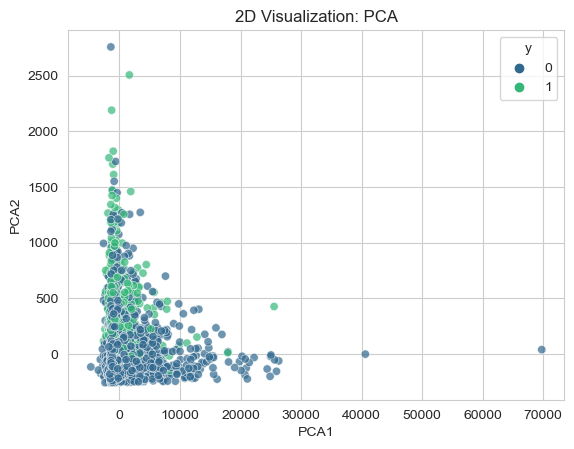

In [193]:
# 2D Reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df.drop('y', axis=1))

# Create a new DataFrame for plotting
df_reduced = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
df_reduced['y'] = df['y']

# Plot the reduced data
sns.scatterplot(data=df_reduced, x='PCA1', y='PCA2', hue='y', palette='viridis', alpha=0.7)
plt.title("2D Visualization: PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

##### Splitting the data

In [34]:
X = df.drop('y', axis=1)
y = df['y']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [38]:
# Characteristics of the Training Set
print("Training Set Class Distribution:\n", y_train.value_counts())
print("Proportion of positive samples in the training set: ", round(y_train.value_counts()[1]/len(y_train)*100, 1))

# Characteristics of the Test Set
print("Testing Set Class Distribution:\n", y_test.value_counts())
print("Proportion of positive samples in the test set: ", round(y_test.value_counts()[1]/len(y_test)*100, 1))

Training Set Class Distribution:
 0    2799
1     365
Name: y, dtype: int64
Proportion of positive samples in the training set:  11.5
Testing Set Class Distribution:
 0    1201
1     156
Name: y, dtype: int64
Proportion of positive samples in the test set:  11.5


##### Training and Test Set Visualization

In [42]:
# Visualize Training and Test Partitions
df_train = pd.concat([X_train, y_train], axis=1)
df_train = df_train.reset_index(drop=True)

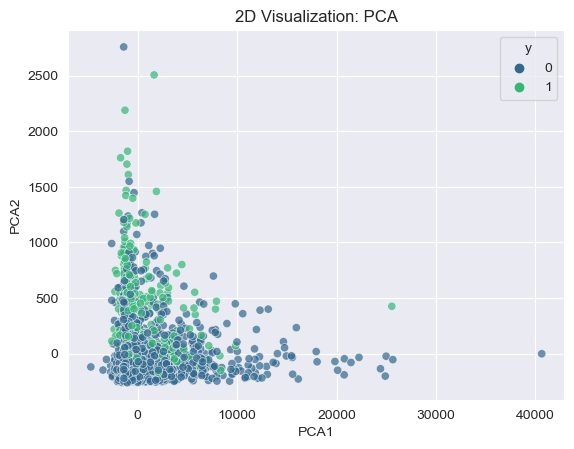

In [141]:
# 2D Reduction
pca = PCA(n_components=2)
reduced_train_data = pca.fit_transform(df_train.drop('y', axis=1))

# Create a new DataFrame for plotting
df_train_reduced = pd.DataFrame(reduced_train_data, columns=['PCA1', 'PCA2'])
df_train_reduced['y'] = df_train['y']

# Plot the reduced data
sns.scatterplot(data=df_train_reduced, x='PCA1', y='PCA2', hue='y', palette='viridis', alpha=0.7)
plt.title("2D Visualization: PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [45]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test = df_test.reset_index(drop=True)

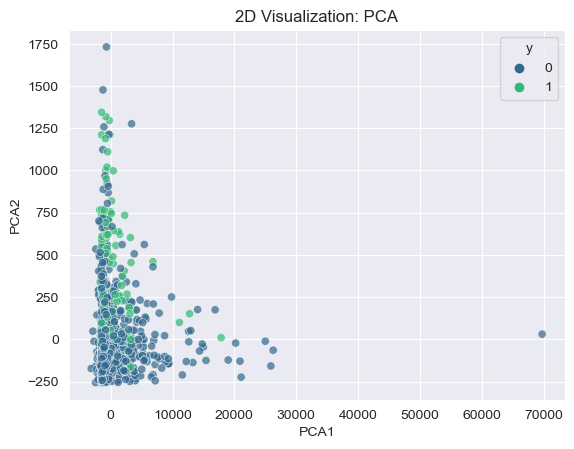

In [142]:
# 2D Reduction
pca = PCA(n_components=2)
reduced_test_data = pca.fit_transform(df_test.drop('y', axis=1))

# Create a new DataFrame for plotting
df_test_reduced = pd.DataFrame(reduced_test_data, columns=['PCA1', 'PCA2'])
df_test_reduced['y'] = df_test['y']

# Plot the reduced data
sns.scatterplot(data=df_test_reduced, x='PCA1', y='PCA2', hue='y', palette='viridis', alpha=0.7)
plt.title("2D Visualization: PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

##### Decision Tree Classifier

In [49]:
# Train decision tree model on training set
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
# Make predictions on test set
y_pred = model.predict(X_test)

In [68]:
# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

##### Model Evaluation

We will focus on the following metrics:

- **Sensitivity:** $Recall = \frac{TP}{TP + FN}$


- **F-measure:** $F1 = \frac{2 \times Precision \times Recall}{Precision + Recall}$


- **G-mean:** $G-Mean = √(Sensitivity + Specificity)$
    - Specificity = $\frac{TN}{TN + FP}$


- **AUC-ROC:** Area Under the Receiver Operating Characteristic Curve

Metrics explained:

- **Sensitivity:** 
    - Measures the model's ability to correctly identify examples of the minority class;
 
- **F-measure:** 
    - Is useful for balancing the needs of high precision (minimizing false positives) and high sensitivity (detecting the majority of positive cases);
 
- **G-mean:** 
    - Evaluates imbalances in performance between classes, i.e. balanced performance between Sensitivity (detecting positives) and Specificity (detecting negatives);
 
- **AUC-ROC:** 
    - Evaluates the model at all possible decision thresholds, providing a complete overview of performance;


In [73]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity
sensitivity = recall_score(y_test, y_pred)

# Specificity
specificity = tn / (tn + fp)

# F1-score
f1 = f1_score(y_test, y_pred)

# G-mean
g_mean = np.sqrt(sensitivity * specificity)

# AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Results
print(f"Sensitivity: {sensitivity:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"G-mean: {g_mean:.2f}")
print(f"AUC: {auc:.2f}")

Sensitivity: 0.42
F1-score: 0.42
G-mean: 0.62
AUC: 0.67


Interpretation of metrics:
- Sensitivity (Recall):
    - This metric suggests that the model has difficulty correctly identifying instances of class 1;
- F1-score:
    - This value means that the model is still performing poorly in the balance between precision and recall;
- G-mean:
    - Although this metric is slightly better than the F1-score, it still shows that there is a significant imbalance in performance between the classes;
- AUC:
    - An AUC above 0.5 indicates that the model can distinguish classes better than randomly, but there is still room for improvement.

### Data Imbalance Handling Techniques

We will focus on the following techniques:

- **Over-Sampling:**
    - Increase the number of examples of the minority class by creating synthetic data or replicating existing examples.

- **Under-Sampling:**
    - Reduces the number of instances of the majority class by removing instances to balance the classes.

- **Hybrid:**
    - It combines over sampling and under sampling to balance the classes while minimizing the risk of overfitting or losing relevant information.

#### Over-Sampling

We will explore the following **Over-Sampling** techniques:
- **SMOTE (Synthetic Minority Over-sampling Technique)**
- **ADASYN (Adaptive Synthetic Sampling)**
- **Random Over-Sampling**

##### SMOTE (Synthetic Minority Over-sampling Technique)

In [75]:
smote = SMOTE(random_state=42)

In [163]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {np.bincount(y_train)}")
print(f"After SMOTE: {np.bincount(y_train_smote)}")

Before SMOTE: [2799  365]
After SMOTE: [2799 2799]


In [144]:
# Visualize Training and Test Partitions
df_train_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

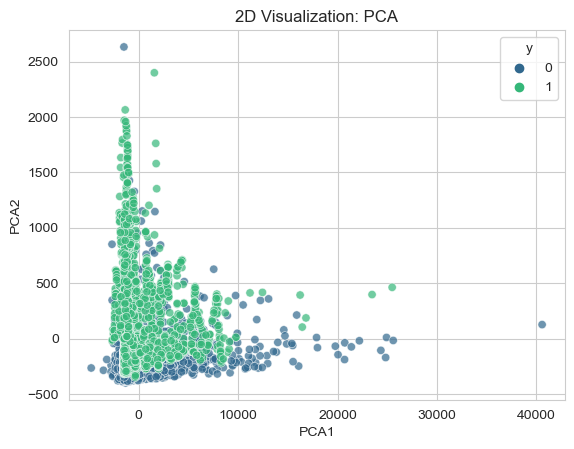

In [195]:
# 2D Reduction
pca = PCA(n_components=2)
reduced_train_data_smote = pca.fit_transform(df_train_smote.drop('y', axis=1))

# Create a new DataFrame for plotting
df_train_reduced_smote = pd.DataFrame(reduced_train_data_smote, columns=['PCA1', 'PCA2'])
df_train_reduced_smote['y'] = df_train_smote['y']

# Plot the reduced data
sns.scatterplot(data=df_train_reduced_smote, x='PCA1', y='PCA2', hue='y', palette='viridis', alpha=0.7)
plt.title("2D Visualization: PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [77]:
model_smote = DecisionTreeClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [79]:
y_pred_smote = model_smote.predict(X_test)
y_pred_prob_smote = model_smote.predict_proba(X_test)[:, 1]

In [80]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_smote).ravel()

# Sensitivity
sensitivity = recall_score(y_test, y_pred_smote)

# Specificity
specificity = tn / (tn + fp)

# F1-score
f1 = f1_score(y_test, y_pred_smote)

# G-mean
g_mean = np.sqrt(sensitivity * specificity)

# AUC
auc = roc_auc_score(y_test, y_pred_prob_smote)

# Results
print(f"Sensitivity: {sensitivity:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"G-mean: {g_mean:.2f}")
print(f"AUC: {auc:.2f}")

Sensitivity: 0.40
F1-score: 0.35
G-mean: 0.59
AUC: 0.64


Observations:
- Although SMOTE balanced the classes, the model's performance worsened.
- This may indicate that the basic model was already benefiting from the imbalance in the classes, or that SMOTE was not enough to deal with the imbalance effectively with the current model.

##### ADASYN (Adaptive Synthetic Sampling)

In [81]:
adasyn = ADASYN(random_state=42)

In [82]:
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [162]:
print(f"Before ADASYN: {np.bincount(y_train)}")
print(f"After ADASYN: {np.bincount(y_train_adasyn)}")

Before ADASYN: [2799  365]
After ADASYN: [2799 2737]


In [146]:
# Visualize Training and Test Partitions
df_train_adasyn = pd.concat([X_train_adasyn, y_train_adasyn], axis=1)

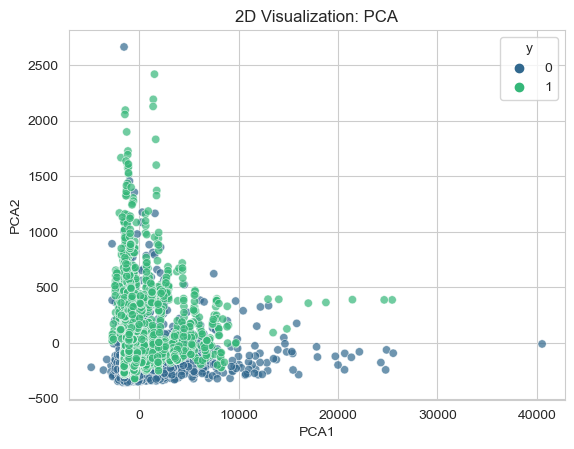

In [196]:
# 2D Reduction
pca = PCA(n_components=2)
reduced_train_data_adasyn = pca.fit_transform(df_train_adasyn.drop('y', axis=1))

# Create a new DataFrame for plotting
df_train_reduced_adasyn = pd.DataFrame(reduced_train_data_adasyn, columns=['PCA1', 'PCA2'])
df_train_reduced_adasyn['y'] = df_train_adasyn['y']

# Plot the reduced data
sns.scatterplot(data=df_train_reduced_adasyn, x='PCA1', y='PCA2', hue='y', palette='viridis', alpha=0.7)
plt.title("2D Visualization: PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [83]:
model_adasyn = DecisionTreeClassifier(random_state=42)
model_adasyn.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(random_state=42)

In [84]:
y_pred_adasyn = model_adasyn.predict(X_test)
y_pred_prob_adasyn = model_adasyn.predict_proba(X_test)[:, 1]

In [85]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adasyn).ravel()

# Sensitivity
sensitivity = recall_score(y_test, y_pred_adasyn)

# Specificity
specificity = tn / (tn + fp)

# F1-score
f1 = f1_score(y_test, y_pred_adasyn)

# G-mean
g_mean = np.sqrt(sensitivity * specificity)

# AUC
auc = roc_auc_score(y_test, y_pred_prob_adasyn)

# Results
print(f"Sensitivity: {sensitivity:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"G-mean: {g_mean:.2f}")
print(f"AUC: {auc:.2f}")

Sensitivity: 0.37
F1-score: 0.35
G-mean: 0.58
AUC: 0.64


Observations:
- This technique showed worse results compared to the initial model.
- It showed a slight decrease compared to the use of SMOTE

##### Random Over-Sampling

In [91]:
ros = RandomOverSampler(random_state=42)

In [92]:
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [161]:
print(f"Before ROS: {np.bincount(y_train)}")
print(f"After ROS: {np.bincount(y_train_ros)}")

Before ROS: [2799  365]
After ROS: [2799 2799]


In [148]:
# Visualize Training and Test Partitions
df_train_ros = pd.concat([X_train_ros, y_train_ros], axis=1)

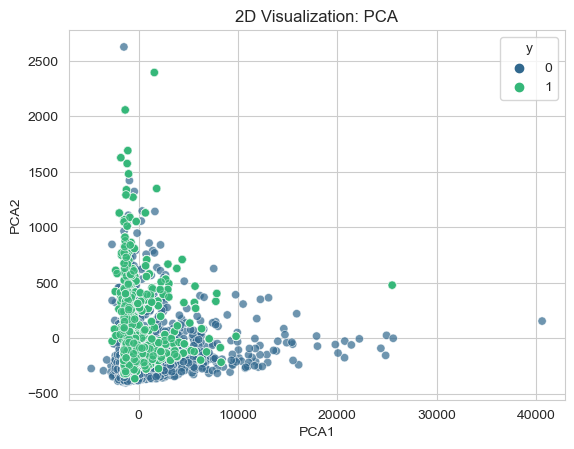

In [197]:
# 2D Reduction
pca = PCA(n_components=2)
reduced_train_data_ros = pca.fit_transform(df_train_ros.drop('y', axis=1))

# Create a new DataFrame for plotting
df_train_reduced_ros = pd.DataFrame(reduced_train_data_ros, columns=['PCA1', 'PCA2'])
df_train_reduced_ros['y'] = df_train_ros['y']

# Plot the reduced data
sns.scatterplot(data=df_train_reduced_ros, x='PCA1', y='PCA2', hue='y', palette='viridis', alpha=0.7)
plt.title("2D Visualization: PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [93]:
model_ros = DecisionTreeClassifier(random_state=42)
model_ros.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(random_state=42)

In [94]:
y_pred_ros = model_ros.predict(X_test)
y_pred_prob_ros = model_ros.predict_proba(X_test)[:, 1]

In [95]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ros).ravel()

# Sensitivity
sensitivity = recall_score(y_test, y_pred_ros)

# Specificity
specificity = tn / (tn + fp)

# F1-score
f1 = f1_score(y_test, y_pred_ros)

# G-mean
g_mean = np.sqrt(sensitivity * specificity)

# AUC
auc = roc_auc_score(y_test, y_pred_prob_ros)

# Results
print(f"Sensitivity: {sensitivity:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"G-mean: {g_mean:.2f}")
print(f"AUC: {auc:.2f}")

Sensitivity: 0.42
F1-score: 0.41
G-mean: 0.62
AUC: 0.67


Observations:
- Random Over-Sampling brought about an adjustment in the distribution of classes, but the metrics did not improve significantly compared to the initial model.
- The model failed to improve substantially in identifying the minority class (with the sensitivity and F1-score still low).
- The AUC and G-mean did not change, which suggests that over-sampling did not have a major impact on the model's overall ability to discriminate between classes.

##### Conclusion about Over-Sampling Techniques:

In this example, although the over-sampling techniques (SMOTE, ADASYN and Random Over-sampling) solved the problem of balancing between classes, they aggravated other problems. 

The significant overlapping of classes in the training data brought more difficulties for the model, resulting in poorer performance. 

Focusing on areas that are difficult to classify, as is the case with ADASYN, can worsen the model's ability to learn the boundaries between classes, especially in areas where classes were already overlapping substantially. 

Also, the use of techniques such as SMOTE and ROS increased complexity for the model, leading to reductions in discrimination capacity.


#### Under-Sampling

We will explore the following **Under-Sampling** techniques:
- **Random Under-Sampling**
- **Tomek Links**
- **Edited Nearest Neighbors (ENN)**

##### Random Under-Sampling

In [97]:
rus = RandomUnderSampler(random_state=42)

In [98]:
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [160]:
print(f"Before RUS: {np.bincount(y_train)}")
print(f"After RUS: {np.bincount(y_train_rus)}")

Before RUS: [2799  365]
After RUS: [365 365]


In [150]:
# Visualize Training and Test Partitions
df_train_rus = pd.concat([X_train_rus, y_train_rus], axis=1)

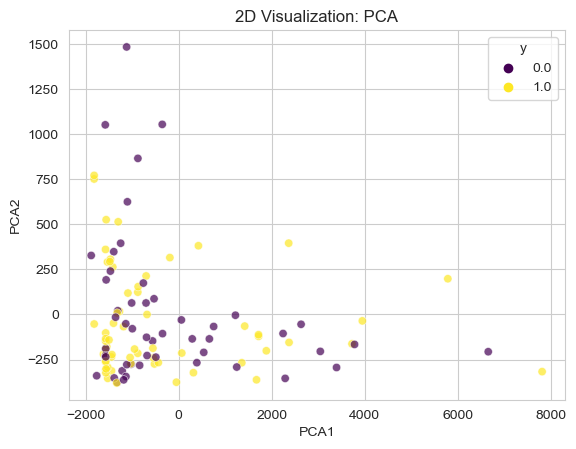

In [198]:
# 2D Reduction
pca = PCA(n_components=2)
reduced_train_data_rus = pca.fit_transform(df_train_rus.drop('y', axis=1))

# Create a new DataFrame for plotting
df_train_reduced_rus = pd.DataFrame(reduced_train_data_rus, columns=['PCA1', 'PCA2'])
df_train_reduced_rus['y'] = df_train_rus['y']

# Plot the reduced data
sns.scatterplot(data=df_train_reduced_rus, x='PCA1', y='PCA2', hue='y', palette='viridis', alpha=0.7)
plt.title("2D Visualization: PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [99]:
model_rus = DecisionTreeClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(random_state=42)

In [100]:
y_pred_rus = model_rus.predict(X_test)
y_pred_prob_rus = model_rus.predict_proba(X_test)[:, 1]

In [101]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rus).ravel()

# Sensitivity
sensitivity = recall_score(y_test, y_pred_rus)

# Specificity
specificity = tn / (tn + fp)

# F1-score
f1 = f1_score(y_test, y_pred_rus)

# G-mean
g_mean = np.sqrt(sensitivity * specificity)

# AUC
auc = roc_auc_score(y_test, y_pred_prob_rus)

# Results
print(f"Sensitivity: {sensitivity:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"G-mean: {g_mean:.2f}")
print(f"AUC: {auc:.2f}")

Sensitivity: 0.67
F1-score: 0.37
G-mean: 0.71
AUC: 0.71


Observations:
- The use of Random Under-sampling brought a significant improvement in sensitivity (an increase of 0.25), indicating that the model was able to better identify the minority class.
- The F1-score was slightly lower than the initial value, but the improvement in sensitivity partially compensated for this.
- The G-mean and AUC increased, indicating that the model now has a better balance between the classes, both in its ability to detect the minority class and in its overall discrimination between the classes.

##### Tomek Links

In [102]:
tl = TomekLinks()

In [103]:
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

In [159]:
print(f"Before TL: {np.bincount(y_train)}")
print(f"After TL: {np.bincount(y_train_tl)}")

Before TL: [2799  365]
After TL: [2675  365]


In [153]:
# Visualize Training and Test Partitions
df_train_tl = pd.concat([X_train_tl, y_train_tl], axis=1)

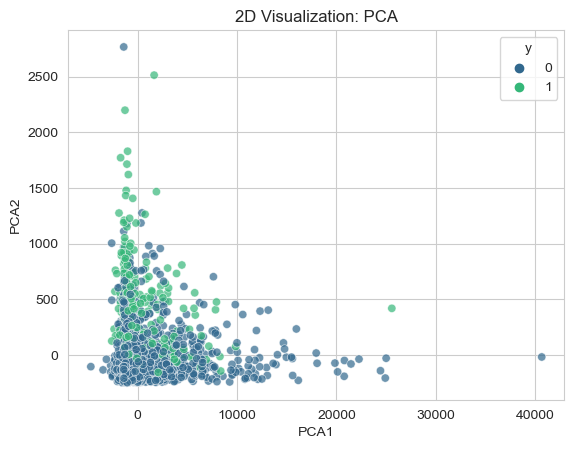

In [199]:
# 2D Reduction
pca = PCA(n_components=2)
reduced_train_data_tl = pca.fit_transform(df_train_tl.drop('y', axis=1))

# Create a new DataFrame for plotting
df_train_reduced_tl = pd.DataFrame(reduced_train_data_tl, columns=['PCA1', 'PCA2'])
df_train_reduced_tl['y'] = df_train_tl['y']

# Plot the reduced data
sns.scatterplot(data=df_train_reduced_tl, x='PCA1', y='PCA2', hue='y', palette='viridis', alpha=0.7)
plt.title("2D Visualization: PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [104]:
model_tl = DecisionTreeClassifier(random_state=42)
model_tl.fit(X_train_tl, y_train_tl)

DecisionTreeClassifier(random_state=42)

In [105]:
y_pred_tl = model_tl.predict(X_test)
y_pred_prob_tl = model_tl.predict_proba(X_test)[:, 1]

In [106]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tl).ravel()

# Sensitivity
sensitivity = recall_score(y_test, y_pred_tl)

# Specificity
specificity = tn / (tn + fp)

# F1-score
f1 = f1_score(y_test, y_pred_tl)

# G-mean
g_mean = np.sqrt(sensitivity * specificity)

# AUC
auc = roc_auc_score(y_test, y_pred_prob_tl)

# Results
print(f"Sensitivity: {sensitivity:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"G-mean: {g_mean:.2f}")
print(f"AUC: {auc:.2f}")

Sensitivity: 0.47
F1-score: 0.42
G-mean: 0.65
AUC: 0.69


Observations:
- The use of Tomek Links was effective in removing noisy instances and slightly improving class separability, especially in terms of sensitivity and AUC. 
- Although the F1-score remained constant, the G-mean and AUC indicate that the model was able to discriminate better between the classes.

##### Edited Nearest Neighbors (ENN)

In [107]:
enn = EditedNearestNeighbours()

In [108]:
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)

In [158]:
print(f"Before ENN: {np.bincount(y_train)}")
print(f"After ENN: {np.bincount(y_train_enn)}")

Before ENN: [2799  365]
After ENN: [2273  365]


In [164]:
# Visualize Training and Test Partitions
df_train_enn = pd.concat([X_train_enn, y_train_enn], axis=1)

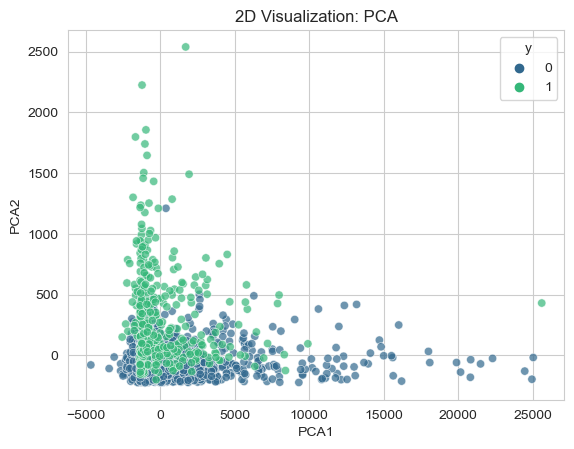

In [200]:
# 2D Reduction
pca = PCA(n_components=2)
reduced_train_data_enn = pca.fit_transform(df_train_enn.drop('y', axis=1))

# Create a new DataFrame for plotting
df_train_reduced_enn = pd.DataFrame(reduced_train_data_enn, columns=['PCA1', 'PCA2'])
df_train_reduced_enn['y'] = df_train_enn['y']

# Plot the reduced data
sns.scatterplot(data=df_train_reduced_enn, x='PCA1', y='PCA2', hue='y', palette='viridis', alpha=0.7)
plt.title("2D Visualization: PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [109]:
model_enn = DecisionTreeClassifier(random_state=42)
model_enn.fit(X_train_enn, y_train_enn)

DecisionTreeClassifier(random_state=42)

In [110]:
y_pred_enn = model_enn.predict(X_test)
y_pred_prob_enn = model_enn.predict_proba(X_test)[:, 1]

In [111]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_enn).ravel()

# Sensitivity
sensitivity = recall_score(y_test, y_pred_enn)

# Specificity
specificity = tn / (tn + fp)

# F1-score
f1 = f1_score(y_test, y_pred_enn)

# G-mean
g_mean = np.sqrt(sensitivity * specificity)

# AUC
auc = roc_auc_score(y_test, y_pred_prob_enn)

# Results
print(f"Sensitivity: {sensitivity:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"G-mean: {g_mean:.2f}")
print(f"AUC: {auc:.2f}")

Sensitivity: 0.66
F1-score: 0.49
G-mean: 0.76
AUC: 0.76


Observations:
- This was the most effective technique, providing a substantial improvement in performance metrics, especially sensitivity, which increased to 0.66.
- The F1-score (0.49) and AUC (0.76) also increased, indicating a better balance between classes and a greater ability to discriminate between classes.
- The G-mean also showed a significant increase (0.76), which suggests that the model is now balancing the errors well in both classes.

##### Conclusion about Under-Sampling Techniques:

Under-sampling techniques such as Random Under-sampling, Tomek Links and ENN helped to improve the overall performance of the model, mainly by eliminating problematic and noisy instances, which contributed to better pattern learning and class separability.

ENN was by far the most effective technique, providing a significant increase in sensitivity, F1-score, AUC, and G-mean.

#### Hybrid Methods

We will explore the following **Hybrid** techniques:
- **ENN + SMOTE**
- **ADASYN + ENN**

##### ENN + SMOTE

In [119]:
ENN = EditedNearestNeighbours()

In [120]:
X_train_ENN, y_train_ENN = ENN.fit_resample(X_train, y_train)

In [166]:
print(f"Before ENN: {np.bincount(y_train)}")
print(f"After ENN: {np.bincount(y_train_ENN)}")

Before ENN: [2799  365]
After ENN: [2273  365]


In [121]:
smote_ENN = SMOTE(sampling_strategy='minority', random_state=42)

In [122]:
X_train_smote_ENN, y_train_smote_ENN = smote_ENN.fit_resample(X_train_ENN, y_train_ENN)

In [167]:
print(f"Before ENN: {np.bincount(y_train)}")
print(f"After ENN + SMOTE: {np.bincount(y_train_smote_ENN)}")

Before ENN: [2799  365]
After ENN + SMOTE: [2273 2273]


In [168]:
# Visualize Training and Test Partitions
df_train_smote_ENN = pd.concat([X_train_smote_ENN, y_train_smote_ENN], axis=1)

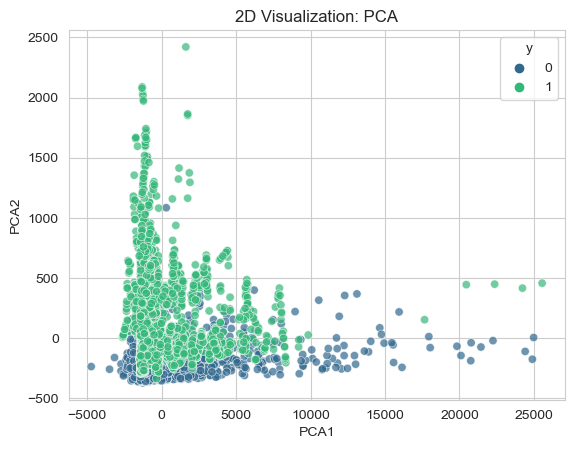

In [201]:
# 2D Reduction
pca = PCA(n_components=2)
reduced_train_data_smote_ENN = pca.fit_transform(df_train_smote_ENN.drop('y', axis=1))

# Create a new DataFrame for plotting
df_train_reduced_smote_ENN = pd.DataFrame(reduced_train_data_smote_ENN, columns=['PCA1', 'PCA2'])
df_train_reduced_smote_ENN['y'] = df_train_smote_ENN['y']

# Plot the reduced data
sns.scatterplot(data=df_train_reduced_smote_ENN, x='PCA1', y='PCA2', hue='y', palette='viridis', alpha=0.7)
plt.title("2D Visualization: PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [123]:
model_smote_ENN = DecisionTreeClassifier(random_state=42)
model_smote_ENN.fit(X_train_smote_ENN, y_train_smote_ENN)

DecisionTreeClassifier(random_state=42)

In [124]:
y_pred_smote_ENN = model_smote_ENN.predict(X_test)
y_pred_prob_smote_ENN = model_smote_ENN.predict_proba(X_test)[:, 1]

In [125]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_smote_ENN).ravel()

# Sensitivity
sensitivity = recall_score(y_test, y_pred_smote_ENN)

# Specificity
specificity = tn / (tn + fp)

# F1-score
f1 = f1_score(y_test, y_pred_smote_ENN)

# G-mean
g_mean = np.sqrt(sensitivity * specificity)

# AUC
auc = roc_auc_score(y_test, y_pred_prob_smote_ENN)

# Results
print(f"Sensitivity: {sensitivity:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"G-mean: {g_mean:.2f}")
print(f"AUC: {auc:.2f}")

Sensitivity: 0.62
F1-score: 0.44
G-mean: 0.73
AUC: 0.73


Observations:
- The combination of ENN + SMOTE is an effective hybrid technique for dealing with unbalanced data, as it not only improves the separability of classes (by removing problematic instances), but also balances classes more intelligently.

- The hybrid technique brought substantial improvements in model performance compared to the initial model

- Sensitivity had the biggest increase, meaning that the model better identifies the minority class.

- The F1-score increased slightly to 0.44, further suggesting that there is an imbalance between precision and recall.

##### ADASYN + ENN

In [183]:
ADASYN = ADASYN(random_state=42)

In [184]:
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)

In [185]:
print(f"Before ADASYN: {np.bincount(y_train)}")
print(f"After ADASYN: {np.bincount(y_train_ADASYN)}")

Before ADASYN: [2799  365]
After ADASYN: [2799 2737]


In [186]:
ENN_ADASYN = EditedNearestNeighbours()

In [187]:
X_train_ADASYN_ENN, y_train_ADASYN_ENN = ENN_ADASYN.fit_resample(X_train_ADASYN, y_train_ADASYN)

In [188]:
print(f"Before ADASYN: {np.bincount(y_train)}")
print(f"After ADASYN + ENN: {np.bincount(y_train_ADASYN_ENN)}")

Before ADASYN: [2799  365]
After ADASYN + ENN: [1941 2737]


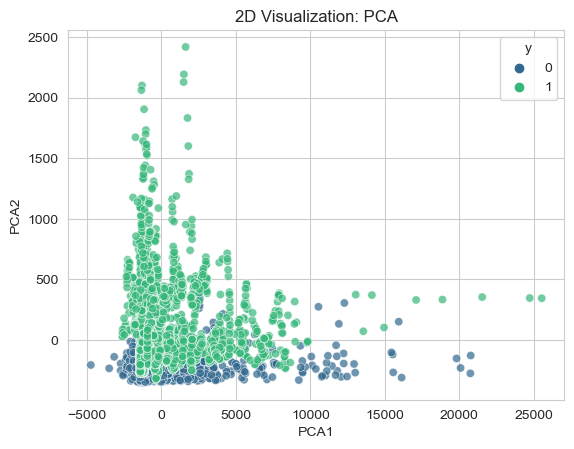

In [202]:
# Visualize Training and Test Partitions
df_train_ADASYN_ENN = pd.concat([X_train_ADASYN_ENN, y_train_ADASYN_ENN], axis=1)

# 2D Reduction
pca = PCA(n_components=2)
reduced_train_data_ADASYN_ENN = pca.fit_transform(df_train_ADASYN_ENN.drop('y', axis=1))

# Create a new DataFrame for plotting
df_train_reduced_ADASYN_ENN = pd.DataFrame(reduced_train_data_ADASYN_ENN, columns=['PCA1', 'PCA2'])
df_train_reduced_ADASYN_ENN['y'] = df_train_ADASYN_ENN['y']

# Plot the reduced data
sns.scatterplot(data=df_train_reduced_ADASYN_ENN, x='PCA1', y='PCA2', hue='y', palette='viridis', alpha=0.7)
plt.title("2D Visualization: PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [190]:
model_ADASYN_ENN = DecisionTreeClassifier(random_state=42)
model_ADASYN_ENN.fit(X_train_ADASYN_ENN, y_train_ADASYN_ENN)

DecisionTreeClassifier(random_state=42)

In [191]:
y_pred_ADASYN_ENN = model_ADASYN_ENN.predict(X_test)
y_pred_prob_ADASYN_ENN = model_ADASYN_ENN.predict_proba(X_test)[:, 1]

In [192]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ADASYN_ENN).ravel()

# Sensitivity
sensitivity = recall_score(y_test, y_pred_ADASYN_ENN)

# Specificity
specificity = tn / (tn + fp)

# F1-score
f1 = f1_score(y_test, y_pred_ADASYN_ENN)

# G-mean
g_mean = np.sqrt(sensitivity * specificity)

# AUC
auc = roc_auc_score(y_test, y_pred_prob_ADASYN_ENN)

# Results
print(f"Sensitivity: {sensitivity:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"G-mean: {g_mean:.2f}")
print(f"AUC: {auc:.2f}")

Sensitivity: 0.60
F1-score: 0.40
G-mean: 0.70
AUC: 0.71


Observations:
- The hybrid ADASYN + ENN technique was effective in improving the sensitivity, G-mean and AUC metrics, which shows progress in discriminating between classes and identifying the minority class.
- However, the F1-score still presents challenges, which indicates that, despite an improvement in sensitivity, the model is still not balancing precision and recall well.

##### Conclusion about Hybrid Techniques:

The use of hybrid resampling techniques, such as ENN + SMOTE and ADASYN + ENN, has proven to be an effective approach to dealing with the problem of unbalanced data and overlapping classes.

These techniques combine the advantages of under-sampling and over-sampling to improve class separability and minority class identification

These techniques resulted in improvements in sensitivity, AUC and G-mean, balancing minority class identification while maintaining a clearer separation of the classes.

Despite these improvements, the F1-score remains an important metric that has not improved substantially, demonstrating difficulties in balancing precision and recall.

## Conclusion

In this work, we explored various resampling techniques, both over-sampling and under-sampling, to deal with the problem of unbalanced data. The over-sampling techniques, such as SMOTE and ADASYN, helped to increase the representativeness of the minority class, however, they showed a decrease in the model's performance, due to the excessive overlapping of the classes. The under-sampling techniques, such as Random Under-sampling, Tomek Links and ENN, were effective in improving the separability of the classes, especially ENN, which proved to be the best technique for this example, helping to remove noisy instances, promoting a better balance between the classes. Hybrid techniques combining over-sampling and under-sampling, such as ENN + SMOTE and ADASYN + ENN, resulted in improvements in overall performance, providing a balance between the creation of synthetic instances and data cleaning. However, they faced some difficulties in improving the f1-score. This is a topic to be explored in the future, which could bring a significant increase in model performance and improve the use of hybrid techniques.